# Module 3 Lab - Statistical Inference

## Directions
1. Show all work/steps/calculations. If it is easier to write it out by hand, do so and submit a scanned PDF in addition to this notebook. Otherwise, generate a Markdown cell for each answer.
2. You must submit to **two** places by the deadline:
    1. In the Lab section of the Course Module where you downloaded this file from, and
    2. In your Lab Discussion Group, in the forum for the appropriate Module.
3. You may use any core Python libraries or Numpy/Scipy. **Additionally, code from the Module notebooks and lectures is fair to use and modify.** You may also consult Stackoverflow (SO). If you use something from SO, please place a comment with the URL to document the code.

In [73]:
import numpy as np
import random as py_random
import time
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
from __future__ import division

%matplotlib inline


# Graph settings
#sns.set(style="darkgrid")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 200)

# Store off seed
seed = int(time.time())

print seed

# Set seed
np.random.seed(seed)
py_random.seed(seed)

1474072343


## Statistical Inference for a single boolean $\theta$

**1\. Suppose we have a trick coin that shows up heads 60% of the time ($\theta=0.6$). Generate 100 samples from this Binomial distribution (either as True/False or 1/0).**

In [119]:
def generate_binomial_samples(p, num_of_samples):
    # Run num_of_samples trials
    return [1 if py_random.random() < p else 0 for i in xrange(num_of_samples)]
    
observed_data_coin = generate_binomial_samples(0.6, 100)
print observed_data_coin

[1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1]


Now, assuming we don't know what $\theta$ really is...

**2\. Calculate $\hat{theta}$.**

In [120]:
print np.mean(observed_data_coin)

0.7


Generate the Non-Parameteric Bayesian Bootstrap of the posterior distribution of $\hat{\theta}$ and answer the following questions:

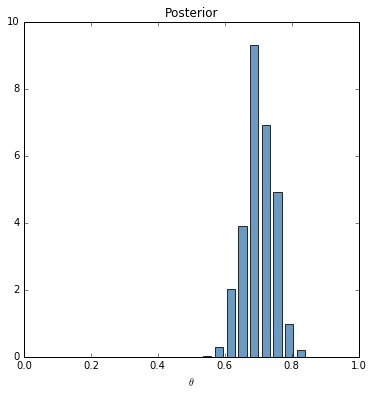

In [121]:
def resample(data):
    n = len(data)
    return [data[i] for i in [py_random.randint(0, n - 1) for _ in xrange(0, n)]]

# Resample observed data 10,000 times
resampled_thetas = np.array([np.mean(sample) for sample in [resample(observed_data_coin) for i in xrange(0, 10000)]])

# Graph resampled data
ys, bins = np.histogram(resampled_thetas, bins=10, density=True)
width = 0.7*(bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
figure = plt.figure(figsize=(6,6))
axes = figure.add_subplot(1, 1, 1)
axes.bar(center, ys, align='center', width=width, color="steelblue", alpha=0.8)
axes.set_xlim([0, 1])
axes.set_xlabel(r"$\theta$")
axes.set_title("Posterior")

**3\. What is the 90% Credible Interval (Bayesian Confidence Interval) for $\hat{\theta}$?**

In [122]:
print "90% CI", stats.mstats.mquantiles(resampled_thetas, [0.05, 0.95])

90% CI [ 0.62  0.77]


**4\. What is the probability that the coin is fair? (use 0.47-0.53 as the range of "fair").**

In [123]:
print "P(0.47 <= theta <= 0.53)", np.mean((0.47 <= resampled_thetas) & (resampled_thetas <= 0.53))

P(0.47 <= theta <= 0.53) 0.0001


**5\. Repeat #1-4 with $\theta = 0.05$.**

In [124]:
observed_data_coin_2 = generate_binomial_samples(0.05, 100)
print observed_data_coin_2

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]


In [130]:
print "2nd sample theta:", np.mean(observed_data_coin_2)

2nd sample theta: 0.06


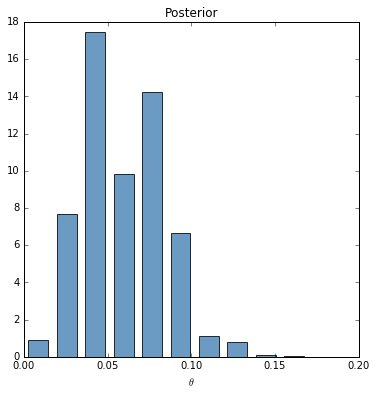

In [133]:
# Resample observed data 10,000 times
resampled_thetas_2 = np.array([np.mean(sample) for sample in [resample(observed_data_coin_2) for i in xrange(0, 10000)]])

# Graph resampled data
ys, bins = np.histogram(resampled_thetas_2, bins=10, density=True)
width = 0.7*(bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
figure = plt.figure(figsize=(6,6))
axes = figure.add_subplot(1, 1, 1)
axes.bar(center, ys, align='center', width=width, color="steelblue", alpha=0.8)
axes.set_xlim([0, .2])
axes.set_xlabel(r"$\theta$")
axes.set_title("Posterior")

In [134]:
print "90% CI", stats.mstats.mquantiles(resampled_thetas_2, [0.05, 0.95])

90% CI [ 0.02  0.1 ]


In [135]:
print "P(0.47 <= theta <= 0.53)", np.mean((0.47 <= resampled_thetas_2) & (resampled_thetas_2 <= 0.53))

P(0.47 <= theta <= 0.53) 0.0


**6\. Compare the results. Were the credible intervals the same size? Did you get the same estimates for being fair? Was your estimate of $\theta$ as good? What does this say about statistical inference on relatively rare events or extreme values?**

For the extreme value ($\theta = 0.05$), the credible interval was 0.08 and the minimum of the credible interval was 0.03 away from the actual value of $\theta$. The probability of it being fair was 0.

For the less-extreme value ($\theta = 0.6$), the credible interval was 0.15 and the minimum of the credible interval was 0.02 away from the actucal value of $\theta$. The probability of it being fair was 0.0001.

Comparing these results against each other, the credible intervals were definitely different with a difference of 0.07. The credible interval for the less-extreme value was also wider. My estimate for the extreme case was only off by 0.01 whereas it was off by 0.1 in the non-extreme case. I'd say these results support the idea that statistical inference generally is able to reason more easily about extreme values relative to some value (like $\theta = 0.05$ and the probability it lies between 0.47 and 0.53). 

## Statistical Inference for a single real valued $\theta$

**1\. Generate 50 observations from a normal distribution with $\mu=102.7$ and $v=0.05$.**

In [136]:
def generate_normal_samples(mean, variance, num_of_samples):
    return np.random.normal(mean, variance, num_of_samples)

# variance = (mean * v)^2
observed_data = generate_normal_samples(102.7, (102.7 * 0.05) ** 2, 50)
print observed_data

[  68.33006157   87.44085567   94.39515287  120.92005271  145.99008077
  131.95552155   75.1008538   110.28961067  118.78250505   59.66332365
   96.65764788   98.70634232   78.39785849  108.27137568  123.09054399
  116.09955918  104.76370468   99.33998128  139.38369335   63.43111898
   61.74523187  109.92296861   77.70166026  131.28798682   65.63848892
  147.15861504  126.33631603   94.02301627  125.86364777   88.5724149
  135.86291061  126.43475126  113.58352328  132.49338936  101.73351425
   93.81193515  131.08792762   58.93179827  109.23971059  120.20770205
   86.30876424   93.48628856   75.71748935  124.06558261  124.01347141
   81.47250919   79.2073726    79.58702844  126.08705754  131.2545932 ]


**2\. What is $\bar{x}$?**

In [137]:
np.mean(observed_data)

103.87695020382803

Generate the Non-Parameteric Bayesian Bootstrap of the posterior distribution of $\bar{x}$ and answer the following questions:

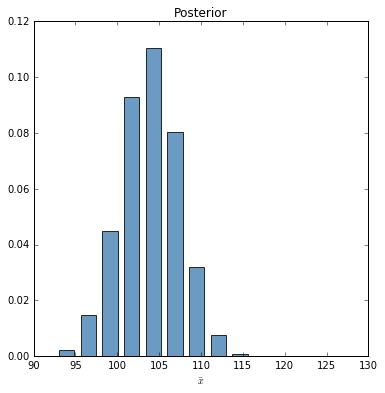

In [138]:
# Resample observed data 10,000 times
resampled_means = np.array([np.mean(sample) for sample in [resample(observed_data) for i in xrange(0, 10000)]])

# Graph resampled data
ys, bins = np.histogram(resampled_means, bins=10, density=True)
width = 0.7*(bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
figure = plt.figure(figsize=(6,6))
axes = figure.add_subplot(1, 1, 1)
axes.bar(center, ys, align='center', width=width, color="steelblue", alpha=0.8)
axes.set_xlim([90, 130])
axes.set_xlabel(r"$\bar{x}$")
axes.set_title("Posterior")

**3\. What is the 90% Credible Interval (Bayesian Confidence Interval) for $\hat{\theta}$?**

In [139]:
print "90% CI", stats.mstats.mquantiles(resampled_means, [0.05, 0.95])

90% CI [  98.04769725  109.51216935]


**4\. Define "about 100". What is the probability that $\bar{x}$ is "about 100".**

I think to calculate "about 100" I'd want to know how much the data points deviate from the mean. As a result, I calculated the standard deviation:

In [62]:
standard_deviation = 102.7 * 0.05
variance = standard_deviation ** 2
print "Standard deviation:", standard_divation

Standard deviation: 5.135


Since the standard deviation is relatively small, I think using a small interval for "about 100" makes sense. Based on the standard deviation, I think it is fair to define "about 100" as 98.5 - 101.5.

The probability that $\bar{x}$ is between 98.5 and 101.5 is:

In [140]:
print "P(98.5 <= sample mean <= 101.5)", np.mean((98.5 <= resampled_means) & (resampled_means <= 101.5))
print "P(102.5 <= sample mean <= 102.8)", np.mean((102.5 <= resampled_means) & (resampled_means <= 102.8))

P(98.5 <= sample mean <= 101.5) 0.1866
P(102.5 <= sample mean <= 102.8) 0.0326


**Repeat #1-4 with $v=0.10$.**

In [141]:
# variance = (mean * v)^2
observed_data_2 = generate_normal_samples(102.7, (102.7 * 0.10) ** 2, 50)
print observed_data_2

[ 139.27767779   68.86816958  -18.00905161  210.29676148   61.86015717
  129.37067036  -42.35428792   86.16972506   56.01630119   54.40184138
  104.70511739  201.2952679   218.2627855    13.86244102  114.76898371
  287.97015799  228.23513409   86.43998972  295.87550609  -11.45472693
   22.59541953  141.51276262  154.68674464   76.62399478  103.19193681
  123.52359874  164.196077    185.13080083 -124.9729486   125.48280145
  230.78822682   63.81928129  279.41677867  178.42002757  145.18435092
  155.71747079   22.85518501  -21.28062709  160.34539923  -72.91130607
  248.4704894  -108.40240433  -19.90160613   16.81288088  -13.70544938
   47.93234456   50.36762515 -203.29974012  225.66091613   93.30936057]


In [143]:
np.mean(observed_data_2)

94.748580252607809

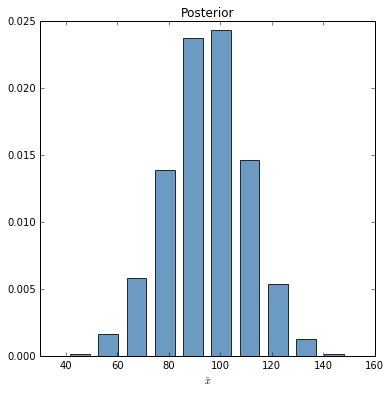

In [147]:
# Resample observed data 10,000 times
resampled_means_2 = np.array([np.mean(sample) for sample in [resample(observed_data_2) for i in xrange(0, 10000)]])

# Graph resampled data
ys, bins = np.histogram(resampled_means_2, bins=10, density=True)
width = 0.7*(bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
figure = plt.figure(figsize=(6,6))
axes = figure.add_subplot(1, 1, 1)
axes.bar(center, ys, align='center', width=width, color="steelblue", alpha=0.8)
axes.set_xlim([30, 160])
axes.set_xlabel(r"$\bar{x}$")
axes.set_title("Posterior")

In [155]:
print "90% CI", stats.mstats.mquantiles(resampled_means_2, [0.05, 0.95])

90% CI [  68.75012258  119.99701024]


In [157]:
print "P(98.5 <= sample mean <= 101.5)", np.mean((98.5 <= resampled_means_2) & (resampled_means_2 <= 101.5))
print "P(102.5 <= sample mean <= 102.8)", np.mean((102.5 <= resampled_means_2) & (resampled_means_2 <= 102.8))

P(98.5 <= sample mean <= 101.5) 0.0747
P(102.5 <= sample mean <= 102.8) 0.0066


**Repeat #1-4 with $v=0.10$ and 500 samples.**

In [142]:
# variance = (mean * v)^2
observed_data_3 = generate_normal_samples(102.7, (102.7 * 0.10) ** 2, 500)
print observed_data_3

[  9.88890859e+01   5.87150677e+01   3.42737239e+01   1.22470054e+01
   1.43113029e+02   1.65804802e+02   1.67725938e+02   2.21116100e+02
   2.33899891e+02   2.13348509e+01   2.18787869e+02   1.76443975e+02
   5.90285325e+01   1.14442383e+02   3.09282530e+01   7.23876652e+01
   2.15757772e+02  -1.86401921e+02   1.28943185e+01  -1.92380502e+02
   3.00653387e+02   1.29920573e+01   1.12421815e+02   1.15308177e+01
   3.53240179e+01   1.20620287e+02   2.22804804e+02  -4.70776161e+01
   6.48898865e+01   2.96084672e+02   1.05207145e+02   7.56919741e+00
  -4.62195228e+01  -3.60830739e+01   2.22661586e+02   1.41541388e+02
   2.67811729e+02  -6.60544699e+01   1.02538176e+02   2.59640156e+01
   1.14912254e+02  -1.09017290e+01   3.78153281e+01   2.49956965e+02
   2.28646417e+02   1.40147609e+02   2.79149511e+01   7.83382445e+01
   1.03183470e+02   2.99224016e+01   1.63947286e+02   1.63651691e+02
  -1.14528620e+02   1.48533464e+02   1.36242091e+02   5.17557982e+01
  -2.33745054e+01   2.49384821e+01

In [144]:
np.mean(observed_data_3)

102.71291041672818

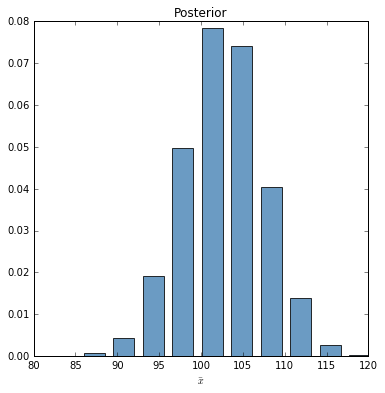

In [154]:
# Resample observed data 10,000 times
resampled_means_3 = np.array([np.mean(sample) for sample in [resample(observed_data_3) for i in xrange(0, 10000)]])

# Graph resampled data
ys, bins = np.histogram(resampled_means_3, bins=10, density=True)
width = 0.7*(bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
figure = plt.figure(figsize=(6,6))
axes = figure.add_subplot(1, 1, 1)
axes.bar(center, ys, align='center', width=width, color="steelblue", alpha=0.8)
axes.set_xlim([80, 120])
axes.set_xlabel(r"$\bar{x}$")
axes.set_title("Posterior")

In [158]:
print "90% CI", stats.mstats.mquantiles(resampled_means_3, [0.05, 0.95])

90% CI [  94.7582896   110.50651947]


In [159]:
print "P(98.5 <= sample mean <= 101.5)", np.mean((98.5 <= resampled_means_3) & (resampled_means_3 <= 101.5))
print "P(102.5 <= sample mean <= 102.8)", np.mean((102.5 <= resampled_means_3) & (resampled_means_3 <= 102.8))

P(98.5 <= sample mean <= 101.5) 0.2122
P(102.5 <= sample mean <= 102.8) 0.0229


Compare and contrast your 3 experiments and what they mean for statistical inference.

The experiment with 500 samples ended up giving the best estimate of the actual mean and was only off by 0.01. This shows the important effect more data can have on tests. This increase in samples also positively decreased the 90% credible interval from 51.247 in the second experiment to 15.75 (for reference, the first experiment had a difference of 11.46). I'm surprised that given these favorable results for the third experiment that it's probability for the sample mean being between 102.5 and 102.8 is 0.0097 lower than the first experiment. My thought is that even with the the increased number of samples in the third experiment, the increased dispersion (it was double that from the first experiment) threw the model off. With that being said, the probability of the sample mean being between 102.5 and 102.8 was increased ~25% between the second and third experiments by increasing the number of samples 900%. This goes to show the effect of how dispersed a variable is can have on a model and its accuracy.